# Titanic - Machine Learning
  
- Será utilizado uma base de dados de competição do [Kaggle](https://www.kaggle.com/competitions/titanic) a respeito do desastre
  
  - O objetivo será **classificar** os passageiros entre **sobreviventes ou não** por meio de suas características;
  
  - Os modelos avaliados estão presentes no pacote [Scikit-Learn](https://scikit-learn.org/);
  
  - A pontuação será dada pelo site do Kaggle com base no **método de acurácia**.

### Tratamento da Base de Dados

In [19]:
import pandas as pd 

df_train = pd.read_csv("dados/train.csv", header=0)
df_test = pd.read_csv("dados/test.csv", header=0)

In [2]:
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


None

In [3]:
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

- Observamos que os dados são compostos por 11 colunas descritivas, sendo estas:

    - PassengerId: Identificação do passageiro no banco de dados (necessário para a avaliação do Kaggle);
    - Pclass: Indicação do nível da classe do passageiro;
    - Name: Nome do passageiro;
    - Sex: Sexo do passageiro;
    - Age: Idade do passageiro;
    - SibSp: Quantidade de cônjugues ou irmãos a bordo; 
    - Parch: Quantidades de pais ou filhos a bordo;
    - Ticket: Bilhete do navio
    - Fare: Tarifa paga pelo passageiro;
    - Cabin: Número da cabine do passageiro;
    - Embarked: Porto de embarque do passageiro.

- Vamos analisar os valores faltantes nos bancos de treino e teste:

In [4]:
df_test.isnull().sum().sort_values(ascending=False).head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

In [5]:
df_train.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

- Em ambos os dados, **faltam informações** a respeito do **número da cabine** do passageiro e **idade**, além de que entre os dados de teste falta o **preço do bilhete** de um passageiro e o **porto de embarque** de dois dos passageiro do banco de treino.

In [21]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Observamos que há colunas **sem informações** que possam nos **refletir um padrão**, por exemplo, as colunas de **nome**, **número do bilhete** e **cabine** a princípio não agregam para a construção do modelo. A priori, vamos **excluí-las**.

- Além disso, a coluna **PassengerId** não será utilizada no conjunto de treino, todavia, no conjunto de teste iremos salvá-la para o carregamento dos dados no Kaggle.

In [7]:
# Exclusão das colunas na base de treino e teste

PassengerID = df_test["PassengerId"]
df_test = df_test.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1)
df_train = df_train.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


- Para o **tratamento** dos dados faltantes, vamos optar por substituir os **dados numéricos** pela **média** e os **dados literais** pela **moda**.

In [8]:
df_test["Age"] = df_test["Age"].fillna(df_test['Age'].mean())
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train["Fare"] = df_train["Fare"].fillna(df_train["Fare"].mean())
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])

- Os modelos utilizados não conseguem interpretar dados literais, dessa forma, supondo que as variáveis **Sexo** e **Porto de Embarque** sejam nominais, realizamos o processo de ***OneHotEnconder*** para tratá-las.

In [9]:
df_train = pd.get_dummies(df_train, columns=["Sex", "Embarked"], prefix=["Sex", "Harbor"])
df_test = pd.get_dummies(df_test, columns=["Sex", "Embarked"], prefix=["Sex", "Harbor"])

- A princípio, não sabemos se a **classe** afeta de maneira **ordinal** os dados, portanto, realizamos o processo de ***OneHotEnconding***.

In [10]:
df_train = pd.get_dummies(df_train, columns=["Pclass"], prefix="Class")
df_test = pd.get_dummies(df_test, columns=["Pclass"], prefix="Class")

df_test.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Harbor_C,Harbor_Q,Harbor_S,Class_1,Class_2,Class_3
0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


- Com os dados tratados, podemos começar a realizar a **análise exploratória**, afim de entender possíveis obter **insights** e encaminharmos à **engenharia de dados**.

## Análise Exploratória

- Vamos a avaliar se a base de dados está balanceada entre as classificações existentes (sobreviventes ou não).

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

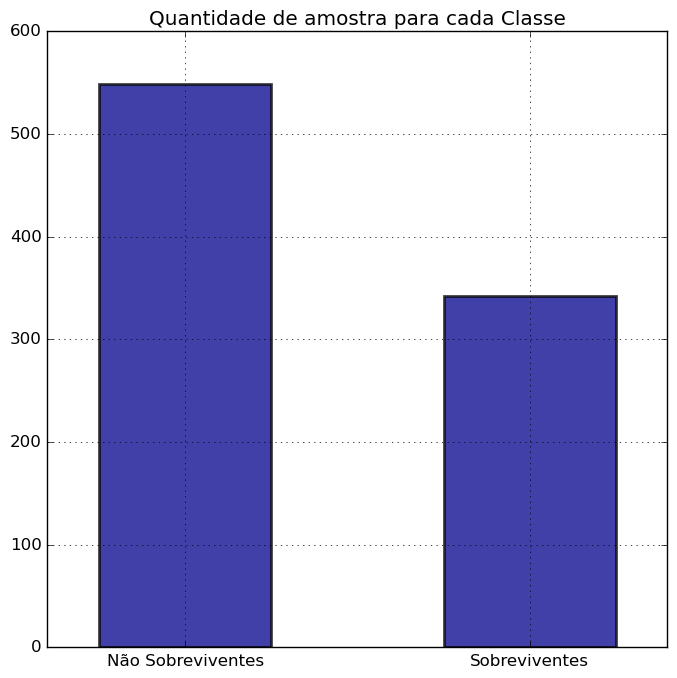

In [14]:

classes = np.unique(df_train["Survived"])
ncl = []

for i in np.arange(0, len(classes)):
    ncl.append(df_train[df_train["Survived"] == i].value_counts().sum())

numbers = np.arange(0, len(classes))
leg = ["Não Sobreviventes", "Sobreviventes"]

plt.figure(figsize=(8,8))
plt.style.use("classic")
plt.grid(True)
plt.bar(numbers, ncl, alpha=.75, width=0.5, color="darkblue", linewidth=2, tick_label=leg)
plt.xticks(numbers)
plt.title("Quantidade de amostra para cada Classe")
plt.show()


- Vemos que não existe uma discrepância considerável entre a quantidade de classe da base, não tendo a necessidade do **balanceamento** dos dados.

- Agora, podemos analisar o comportamento das colunas do cunjunto de dados, começando pela idade dos passageiros.

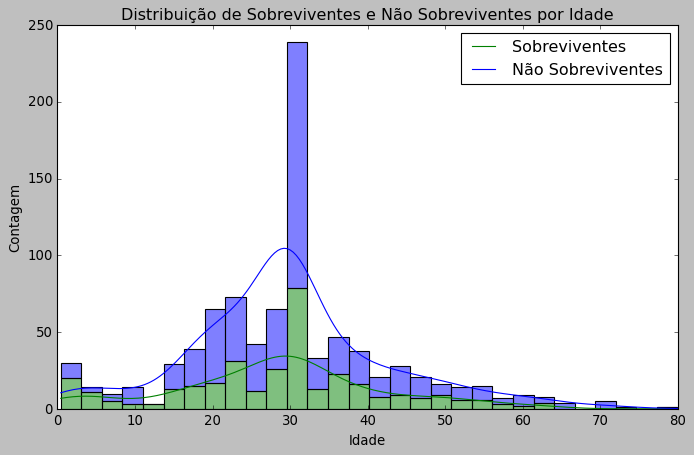

In [15]:
plt.figure(figsize=(10, 6))

leg = [ "Sobreviventes","Não Sobreviventes" ]
sns.histplot(data=df_train, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)

plt.title('Distribuição de Sobreviventes e Não Sobreviventes por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(leg)
plt.show()

- Notamos que entre as crianças há mais sobreviventes que não sobreviventes, o contrário ocorre quando analisamos pessoas idosas.

- Quanto a coluna do sexo dos passageiros, podemos fazer uma análise entre masculino e femino e também avaliar a relação com a idade de pessoas de sexo diferente.

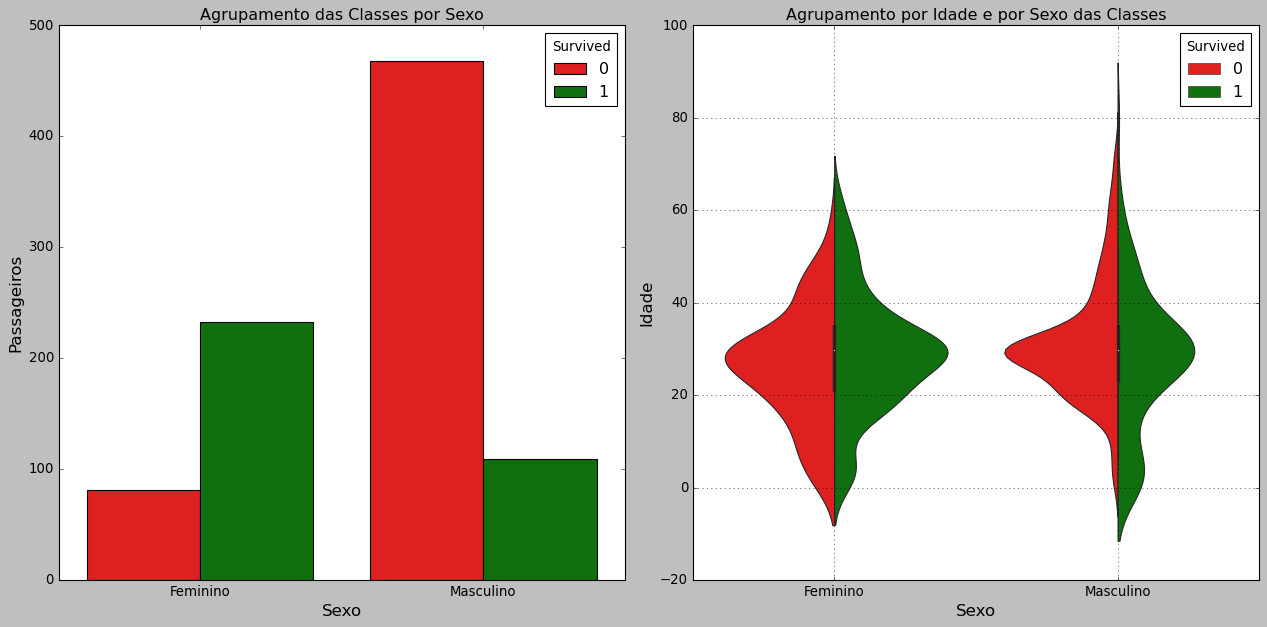

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(data=df_train, x="Sex_male", hue="Survived", palette={0: "red", 1: "green"}, ax=ax[0])
ax[0].set_xlabel("Sexo", fontsize=15)
ax[0].set_ylabel("Passageiros", fontsize=15)
ax[0].set_title("Agrupamento das Classes por Sexo")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Feminino", "Masculino"])

sns.violinplot(data=df_train, x="Sex_male", y="Age", hue="Survived", split=True, palette={0: "red", 1: "green"}, ax=ax[1])
ax[1].set_xlabel("Sexo", fontsize=15)
ax[1].set_ylabel("Idade", fontsize=15)
ax[1].set_title("Agrupamento por Idade e por Sexo das Classes")
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Feminino", "Masculino"])
ax[1].grid(True)

plt.tight_layout()
plt.show()

- Observamos que a informação do **Sexo** é relevante para a classificação dos sobrevieventes, dado que dentre as mulheres a maioria sobreviveu. Além disso, combinando as informações de idade e sexo, vemos que as dentre os homens, apenas as crianças tiveram mais de chance de sobreviver.

- Podemos realizar um estudo a respeito das sobrevivências em função das **classes** de cabines.

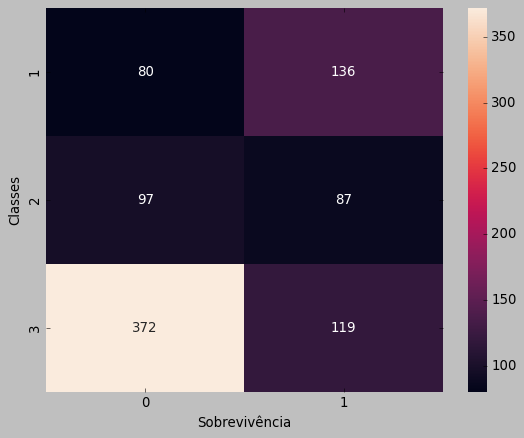

In [17]:
df_train_grafico = pd.read_csv("dados/train.csv", header=0)
group = df_train_grafico.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot=True, fmt="d")
plt.xlabel("Sobrevivência")
plt.ylabel("Classes")
plt.show()

- Notamos que a discrepância entre sobreviventes e não sobreviventes ocorre na **1ª** e **3ª** classe, em que na primeira classe há mais sobreviventes que mortes, e o contrário ocorre na terceira classe. 

- Talvez encontramos um padrão parecido ao analisarmos a sobrevivência em função dos preços dos bilhetes.

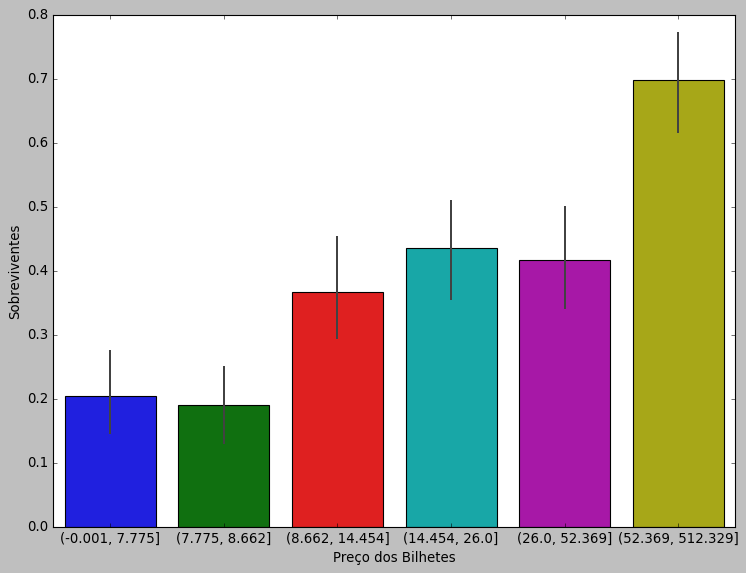

In [18]:
df_train_grafico["Fare"] = pd.qcut(df_train["Fare"], 6)
plt.figure(figsize=(11,8))
sns.barplot(df_train_grafico, x="Fare", y="Survived")
plt.xlabel("Preço dos Bilhetes")
plt.ylabel("Sobreviventes")
plt.show()

- Como esperado, os indivíduos que pagaram mais caros em seus bilhetes tiveram mais chances de sobreviver.

- Podemos estudar em conjunto as informações de classe e porto de embarque.

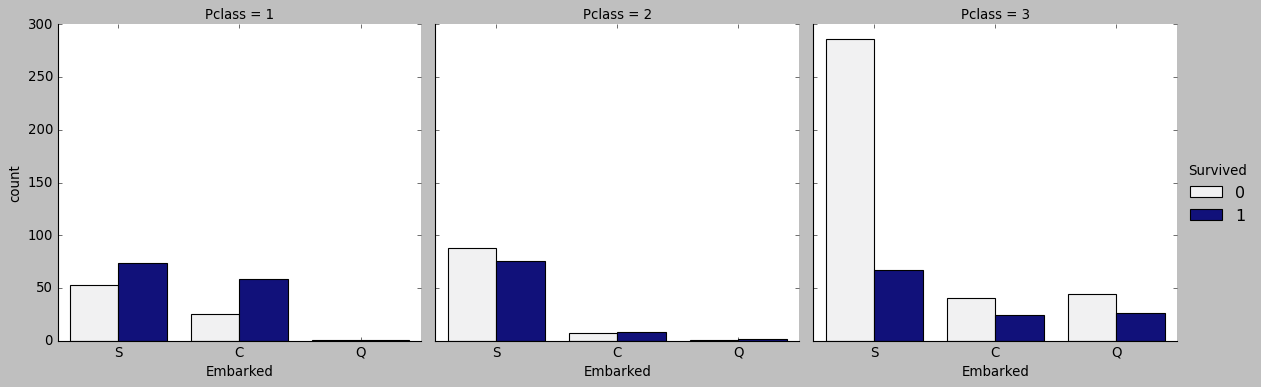

In [19]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df_train_grafico, color="darkblue")
plt.show()


- Vemos que a maior discrepância ocorre no porto de Southampton, mas as informações ainda estão condizentes com a análise das classes.

- Analisando agora, as informações das classes com o sexo dos indivíduos.

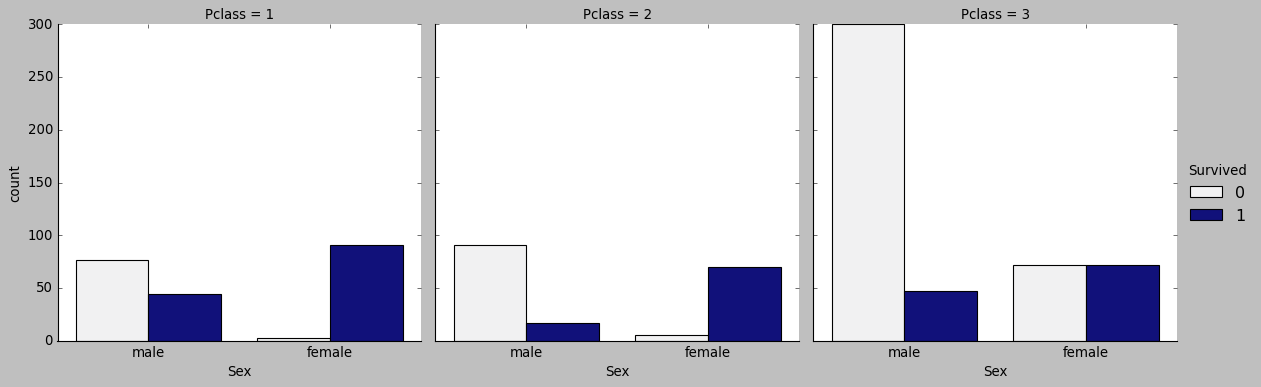

In [20]:

sns.catplot(x ='Sex', hue ='Survived',
kind ='count', col ='Pclass', data = df_train_grafico, color="darkblue")
plt.show()

- Nesse caso, observamos que a informação das classes foram submissas as informações do sexo, pois, mesmo na primeira classe os homens ainda tem menos chance de sobreviver, porém, as mulheres da 1ª e 2ª classe quase que sem exceções sobreviveram.

- Agora, passamos a estudar a influência dos parentescos a bordo do navio, começando por **Pais e/ou Filhos**.

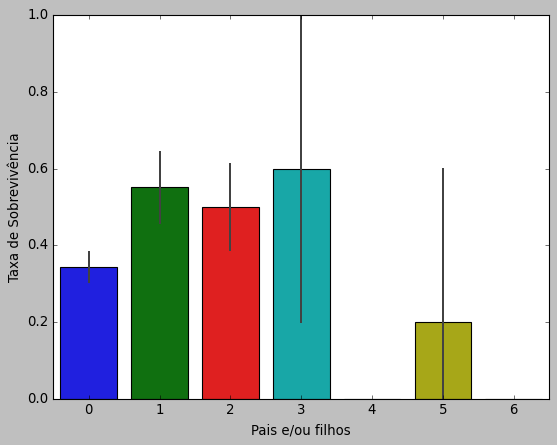

In [21]:
sns.barplot(df_train_grafico, x = "Parch", y = "Survived")
plt.xlabel("Pais e/ou filhos")
plt.ylabel("Taxa de Sobrevivência")
plt.show()

- Não notamos um relação nítida, mas pode ser uma informação relevante em conjunto com outras.

- Abaixo, analisamos a coluna de **Irmãos e/ou Cônjugue**.

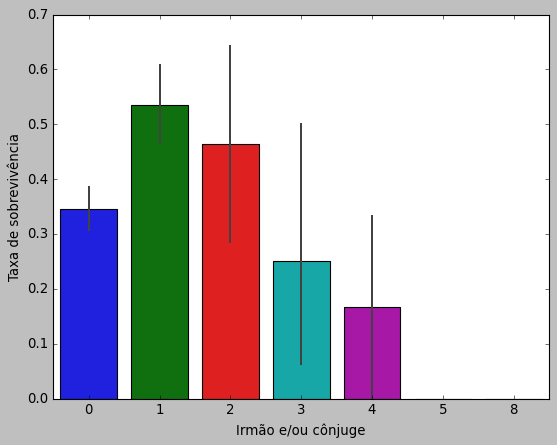

In [22]:
sns.barplot(df_train_grafico, x="SibSp", y="Survived")
plt.xlabel("Irmão e/ou cônjuge")
plt.ylabel("Taxa de sobrevivência")
plt.show()

- Observamos que quando o indivíduo possui 1 quantidade desta classe, há mais chance de sobrevivência, pode ser associado à sobrevivêmcia de mulheres casadas.

- Realizamos também o estudo da **correlação** entre as classes.

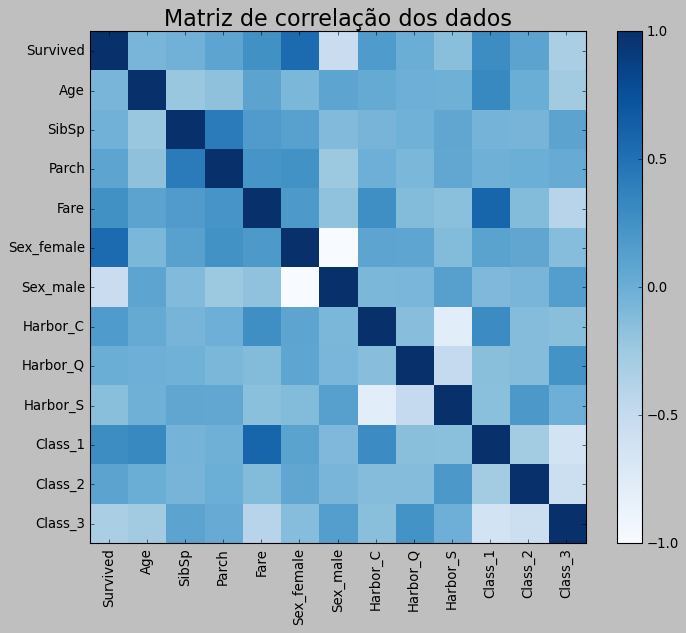

In [23]:
corr = df_train.corr()

plt.figure(figsize=(10,8))

plt.imshow(corr, cmap="Blues", interpolation="none", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation="vertical")
plt.yticks(range(len(corr)), corr.columns)
plt.title("Matriz de correlação dos dados", fontsize=20)
plt.grid(False)
plt.show()

- Então, concluímos que as conclusões feitas acima estão de acordo com o observado na matriz.

- A partir da **Análise Exploratória** vemos como os **atributos** estão relacionados com a **sobrevivência** dos passageiros.

- Por fim, realizamos uma **Análise Dimensional** do conjunto, com o método de **PCA**, para termos base do quão **Robusto** terá de ser nossos modelos.

In [24]:
df_train.head()


,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Harbor_C,Harbor_Q,Harbor_S,Class_1,Class_2,Class_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [25]:
data = df_train.to_numpy()
n_row, n_col = data.shape
X_train = data[:,1:n_col]
y = data[:,0]
X_test = df_test.to_numpy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

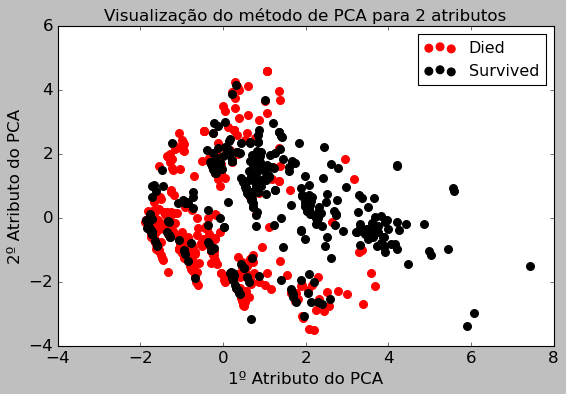

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

#implementação para visualização do método

classes = np.unique(y)
colors = ['r', 'black']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Survived'
    else:
        lb = 'Died'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], 
                label = lb)
    aux = aux + 1
    
plt.legend()
plt.xlabel("1º Atributo do PCA", fontsize=15)
plt.ylabel("2º Atributo do PCA", fontsize=15)
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
plt.title("Visualização do método de PCA para 2 atributos", fontsize = 15)
plt.show(True)

- Mesmo utilizando os dois atributos que melhor separam os dados, obtemos uma separação inconclusiva em 2 dimensões;

- Vamos analisar, segundo o PCA, quantos atributos deste conjunto seriam necessários para classificar os sobreviventes com 80%, 90% e 95% de acerto.

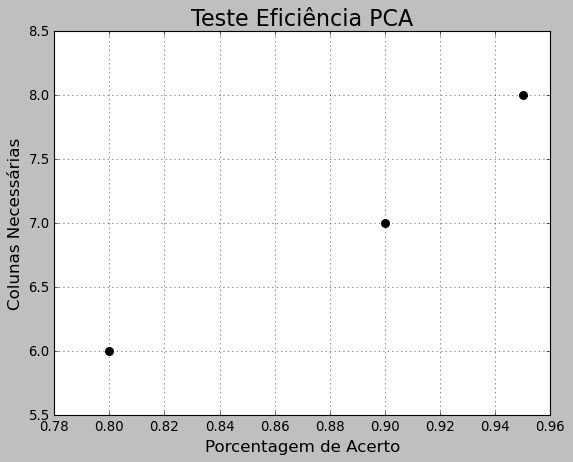

In [27]:
porc_acerto = [0.8, 0.9, 0.95]
col_necessarias = []

for i in porc_acerto:
    pca2 = PCA(i)
    pca_results2 = pca2.fit_transform(X_train)
    col_necessarias.append(pca_results2.shape[1])

plt.scatter(x=porc_acerto, y=col_necessarias, s=50, c="black")
plt.grid(True)
plt.xlabel("Porcentagem de Acerto", fontsize=15)
plt.ylabel("Colunas Necessárias", fontsize=15)
plt.title("Teste Eficiência PCA",  fontsize=20)
plt.show()

- Vemos que o conjunto possui colunas que para o PCA não seriam necessárias, mas ainda assim, parece necessitar de um modelo robusto para uma boa classificação, dado que existem muitas colunas relevantes.

- Passamos agora para a etapa de **Seleção de Modelos**.

In [10]:
df_train.to_csv("dados/treino_tratado.csv", index=False)
df_test.to_csv("dados/teste_tratado.csv", index=False)
PassengerID.to_csv("dados/passengerid.csv", index=False)